In [1]:
from roms_tools.setup.river_forcing import RiverForcing, Grid

In [2]:
from datetime import datetime

In [3]:
%%time

grid = Grid(
    nx=100,  # number of points in the x-direction (not including 2 boundary cells on either end)
    ny=100,  # number of points in the y-direction (not including 2 boundary cells on either end)
    size_x=800,  # size of the domain in the x-direction (in km)
    size_y=800,  # size of the domain in the y-direction (in km)
    center_lon=-18,  # longitude of the center of the domain
    center_lat=65,  # latitude of the center of the domain
    rot=20,  # rotation of the grid's x-direction from lines of constant longitude, with positive values being a counter-clockwise rotation
    N = 20  # number of vertical layers
)

CPU times: user 1.47 s, sys: 216 ms, total: 1.69 s
Wall time: 4.56 s


In [4]:
%%time

global_river_forcing = RiverForcing(
    grid=grid,
    start_time=datetime(2000, 1, 1), 
    end_time=datetime(2000, 12, 31),
    source={"name": "DAI", "path": "/global/cfs/projectdirs/m4746/Datasets/DAI/coastal-stns-Vol-monthly.updated-May2019.nc"}
)

INFO - Compute climatology for river forcing.


CPU times: user 666 ms, sys: 178 ms, total: 844 ms
Wall time: 1.66 s


In [5]:
global_river_forcing.ds

<xarray.Dataset> Size: 2kB
Dimensions:       (river_time: 12, nriver: 6, ntracers: 2)
Coordinates:
    month         (river_time) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * river_time    (river_time) timedelta64[ns] 96B 15 days 45 days ... 349 days
  * nriver        (nriver) object 48B 'Hvita(Olfusa)' 'Thjorsa' ... 'Svarta'
  * ntracers      (ntracers) <U11 88B 'temperature' 'salinity'
Data variables:
    river_volume  (river_time, nriver) float32 288B 396.0 273.3 ... 38.2 8.47
    river_tracer  (river_time, nriver, ntracers) float64 1kB 17.0 1.0 ... 1.0

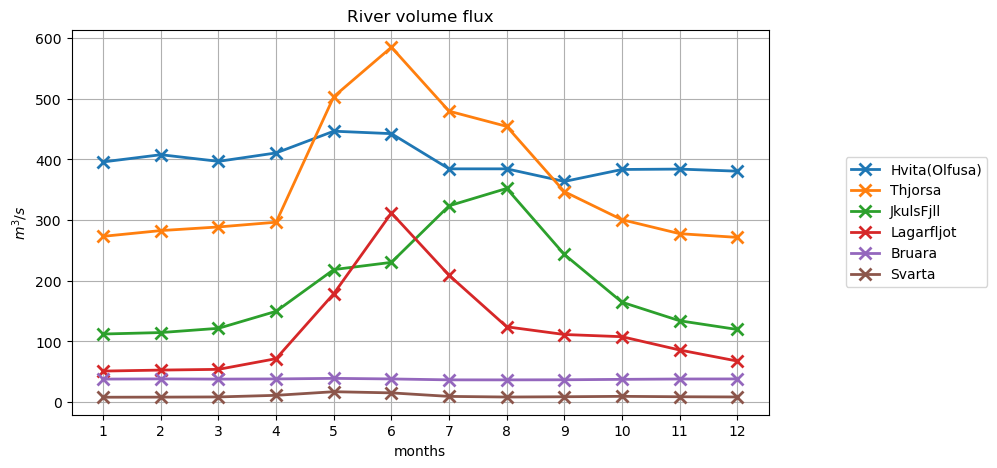

In [6]:
global_river_forcing.plot()

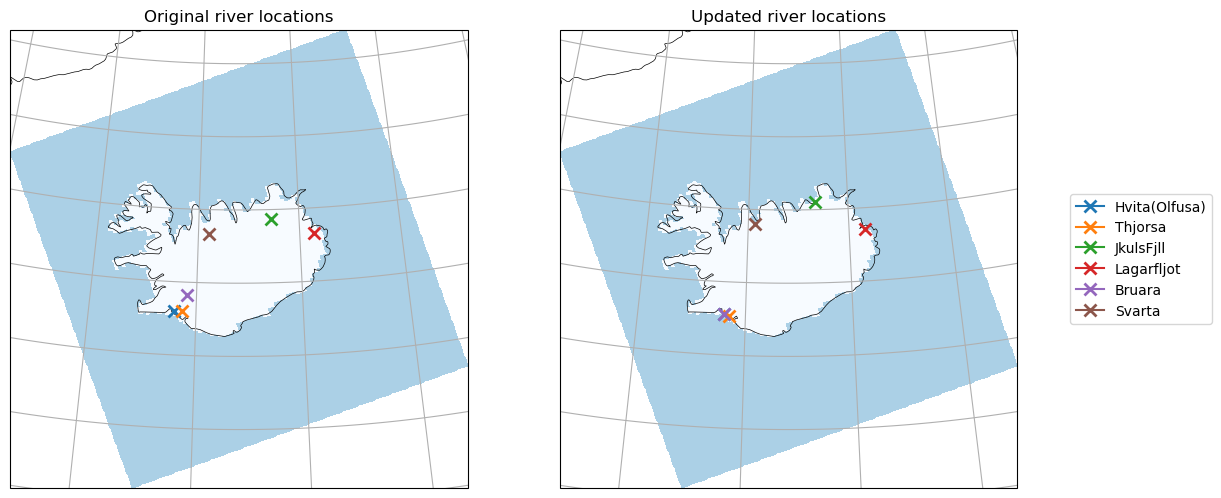

In [7]:
global_river_forcing.plot_locations()

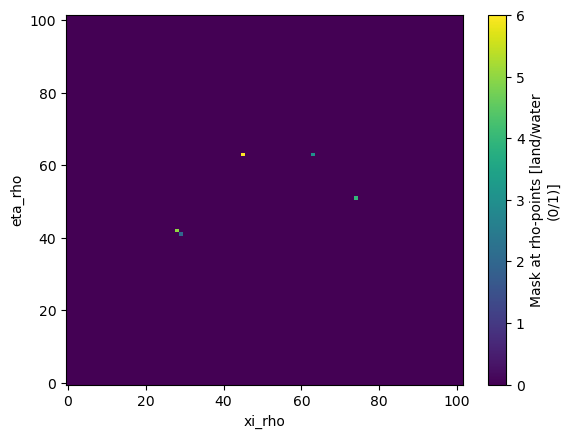

In [8]:
grid.ds.river_flux.plot()

In [9]:
%%time

iceland_river_forcing = RiverForcing(
    grid=grid,
    start_time=datetime(2023, 1, 1), 
    end_time=datetime(2023, 10, 31),
    source={"name": "DAI", "path": "/pscratch/sd/u/uheede/Nora_river/river_dataset/Hvalfjordur_rivers_2023.nc"}
)

WARNING - No records found at or before the start_time.


CPU times: user 56.1 ms, sys: 352 µs, total: 56.4 ms
Wall time: 73.5 ms


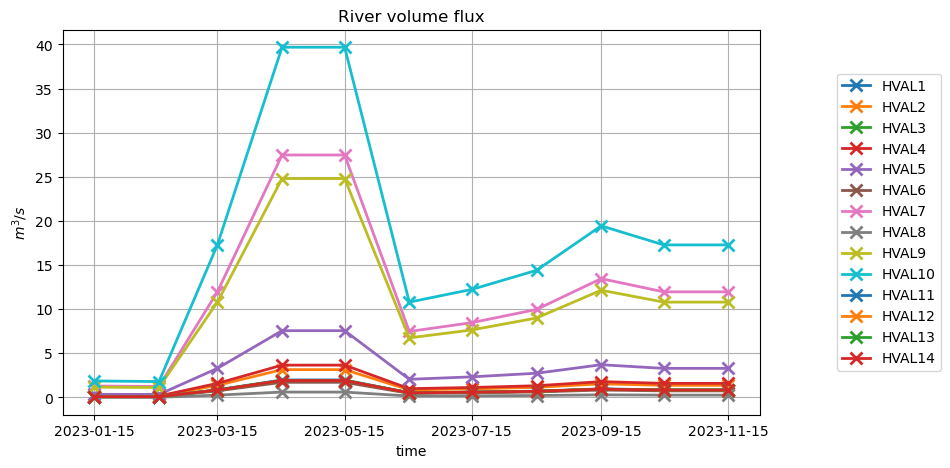

In [10]:
iceland_river_forcing.plot()

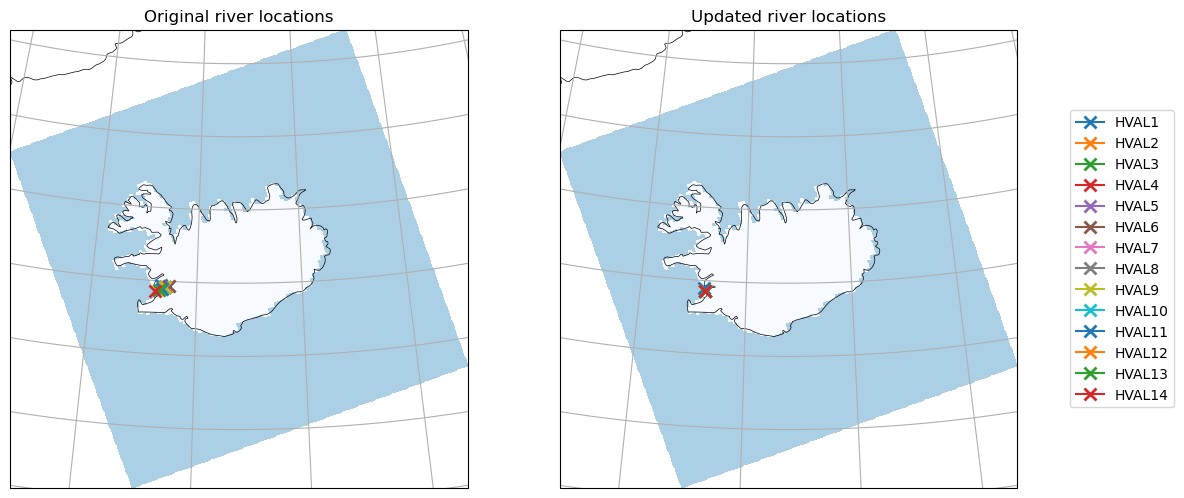

In [11]:
iceland_river_forcing.plot_locations()

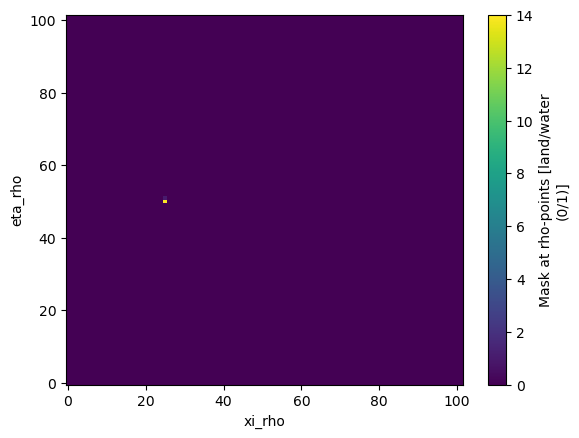

In [12]:
grid.ds.river_flux.plot()

## Produced by matlab scripts

In [1]:
import xarray as xr

In [2]:
ds_matlab = xr.open_dataset("/pscratch/sd/u/uheede/Nora_river/Iceland3_rivfrc.nc")

In [3]:
ds_matlab

<xarray.Dataset> Size: 2kB
Dimensions:       (river_time: 12, nriver: 14, ntracers: 2)
Coordinates:
  * river_time    (river_time) float32 48B 8.415e+03 8.446e+03 ... 8.749e+03
Dimensions without coordinates: nriver, ntracers
Data variables:
    river_volume  (river_time, nriver) float32 672B ...
    river_tracer  (river_time, ntracers, nriver) float32 1kB ...

In [88]:
ds_matlab.river_tracer.isel(nriver=0).values

array([[17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.],
       [17.,  1.]], dtype=float32)

In [81]:
ds_matlab.river_volume.isel(nriver=0).values

array([0.09364589, 0.09004412, 0.8644235 , 1.9845724 , 1.9845724 ,
       0.5402647 , 0.6123    , 0.72035295, 0.9724765 , 0.8644235 ,
       0.8644235 , 0.8752288 ], dtype=float32)

In [14]:
ds_grid_matlab = xr.open_dataset("/pscratch/sd/u/uheede/Nora_river/Iceland3_grd.nc")
ds_grid_matlab

<xarray.Dataset> Size: 45MB
Dimensions:       (one: 1, eta_rho: 722, xi_rho: 722, eta_coarse: 362,
                   xi_coarse: 362)
Dimensions without coordinates: one, eta_rho, xi_rho, eta_coarse, xi_coarse
Data variables: (12/20)
    spherical     (one) |S1 1B ...
    angle         (eta_rho, xi_rho) float64 4MB ...
    h             (eta_rho, xi_rho) float64 4MB ...
    hraw          (eta_rho, xi_rho) float64 4MB ...
    f             (eta_rho, xi_rho) float64 4MB ...
    pm            (eta_rho, xi_rho) float64 4MB ...
    ...            ...
    lon_coarse    (eta_coarse, xi_coarse) float64 1MB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 1MB ...
    angle_coarse  (eta_coarse, xi_coarse) float64 1MB ...
    h_coarse      (eta_coarse, xi_coarse) float64 1MB ...
    mask_coarse   (eta_coarse, xi_coarse) float64 1MB ...
    river_flux    (eta_rho, xi_rho) float32 2MB ...
Attributes:
    Title:    ROMS grid by Easy Grid. Settings: nx: 720 ny: 720 xsize: 72 ysi...
    Date:     07-Aug-2023
    Type:     ROMS grid produced by Easy Grid

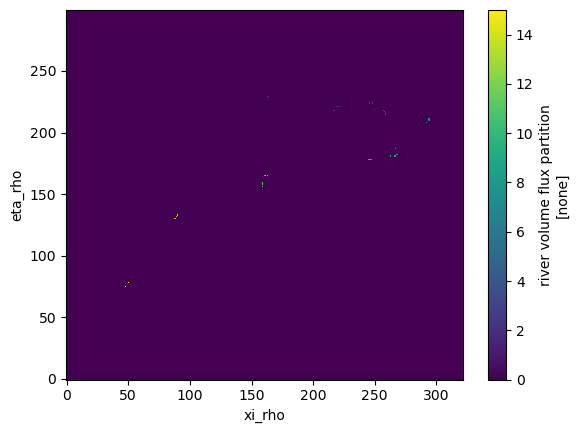

In [41]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(400, None), eta_rho=slice(300, 600)).plot()

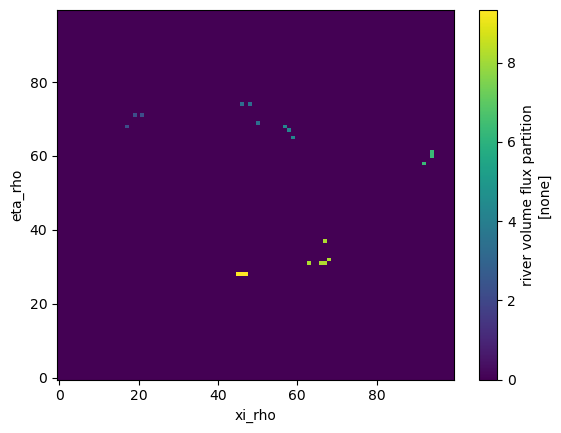

In [53]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(600, 700), eta_rho=slice(450, 550)).plot()

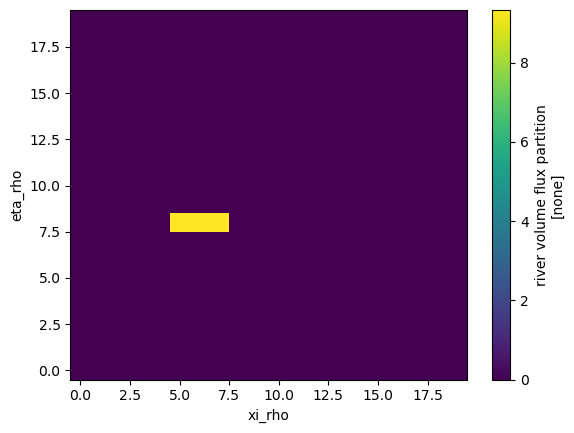

In [65]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(640, 660), eta_rho=slice(470, 490)).plot()

In [15]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(640, 660), eta_rho=slice(470, 490)).values

array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,


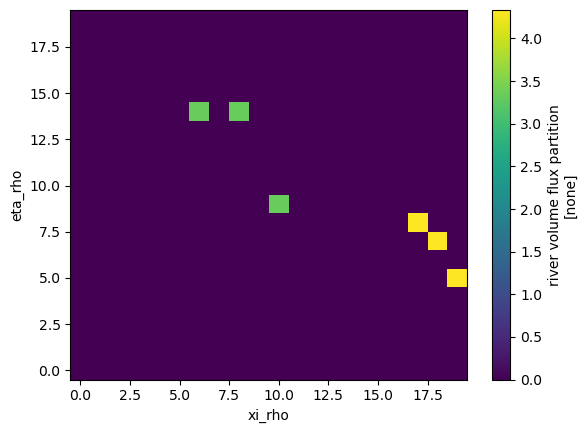

In [60]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(640, 660), eta_rho=slice(510, 530)).plot()

In [61]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(640, 660), eta_rho=slice(510, 530)).values

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 

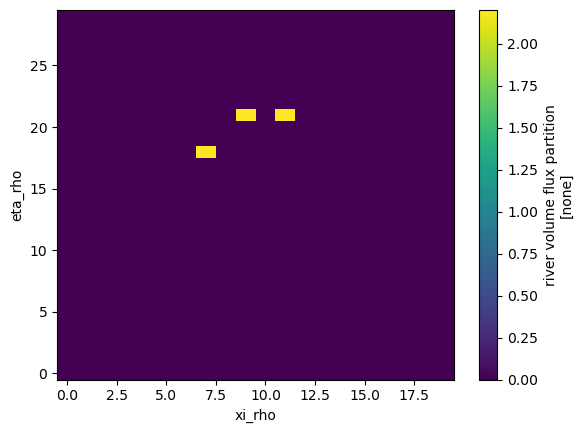

In [55]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(610, 630), eta_rho=slice(500, 530)).plot()

In [56]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(610, 630), eta_rho=slice(500, 530)).values

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0

In [52]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(550, 570), eta_rho=slice(450, 470)).values

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 11.2,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.

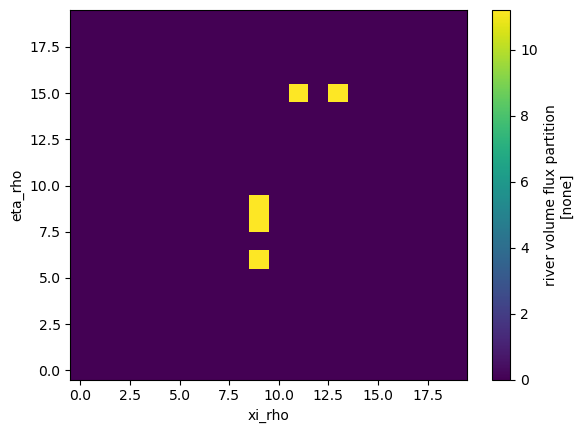

In [50]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(550, 570), eta_rho=slice(450, 470)).plot()

In [48]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(440, 455), eta_rho=slice(370, 380)).values

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]], dtype=float32)

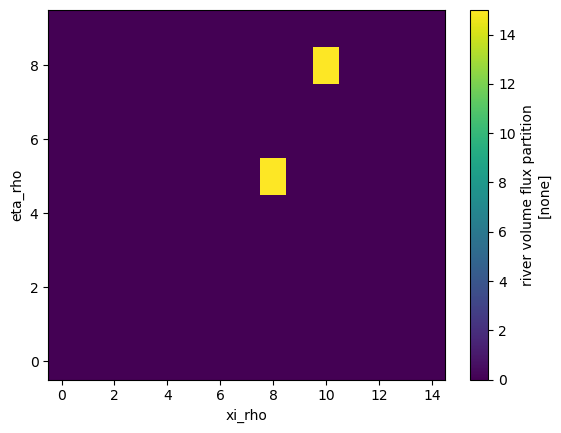

In [46]:
ds_grid_matlab.river_flux.isel(xi_rho=slice(440, 455), eta_rho=slice(370, 380)).plot()

In [20]:
ds_grid_matlab.river_flux.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
positive_values = ds_grid_matlab.river_flux.where(ds_grid_matlab.river_flux > 0, drop=True)

In [18]:
import numpy as np

In [19]:
positive_values_list = positive_values.values[~np.isnan(positive_values.values)].tolist()

In [20]:
positive_values_list

[15.0,
 15.0,
 13.333333015441895,
 13.333333015441895,
 13.333333015441895,
 11.199999809265137,
 11.199999809265137,
 11.199999809265137,
 11.199999809265137,
 11.199999809265137,
 9.333333015441895,
 9.333333015441895,
 9.333333015441895,
 8.199999809265137,
 8.199999809265137,
 8.199999809265137,
 8.199999809265137,
 8.199999809265137,
 6.333333492279053,
 6.333333492279053,
 6.333333492279053,
 4.333333492279053,
 4.333333492279053,
 2.200000047683716,
 4.333333492279053,
 3.3333332538604736,
 2.200000047683716,
 2.200000047683716,
 3.3333332538604736,
 3.3333332538604736,
 2.200000047683716,
 2.200000047683716]

In [77]:
sorted_positive_values = sorted(positive_values_list)

In [78]:
sorted_positive_values

[2.200000047683716,
 2.200000047683716,
 2.200000047683716,
 2.200000047683716,
 2.200000047683716,
 3.3333332538604736,
 3.3333332538604736,
 3.3333332538604736,
 4.333333492279053,
 4.333333492279053,
 4.333333492279053,
 6.333333492279053,
 6.333333492279053,
 6.333333492279053,
 8.199999809265137,
 8.199999809265137,
 8.199999809265137,
 8.199999809265137,
 8.199999809265137,
 9.333333015441895,
 9.333333015441895,
 9.333333015441895,
 11.199999809265137,
 11.199999809265137,
 11.199999809265137,
 11.199999809265137,
 11.199999809265137,
 13.333333015441895,
 13.333333015441895,
 13.333333015441895,
 15.0,
 15.0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.arange(10)
y = np.random.rand(10)
sc = ax.scatter(x, y)

def on_pick(event):
    if event.artist == sc:
        ind = event.ind[0]
        print(f'Clicked on point: ({x[ind]}, {y[ind]})')

fig.canvas.mpl_connect('pick_event', on_pick)
plt.show()